# Optimization and Estimation

To accomplish the goal of reducing the generalization error, we need to pay attention to overfitting in addition to using the optimization algorithm to reduce the training error. We begin by importing a few libraries with a function to annotate in a figure.

In [ ]:
!pip install d2l==0.11.2

In [ ]:
!pip install mxnet

In [3]:
%matplotlib inline
import d2l
from mpl_toolkits import mplot3d
import numpy as np

In [4]:
# Save to the d2l package.
def annotate(text, xy, xytext):
  d2l.plt.gca().annotate(text, xy=xy, xytext=xytext, arrowprops=dict(arrowstyle='->'))

The graph below illustrates the issue in some more detail. Since we have only a finite amount of data the
minimum of the training error may be at a different location than the minimum of the expected error (or of
the test error).

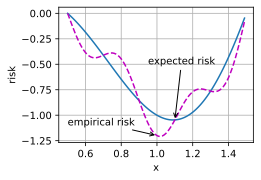

In [5]:
def f(x): 
  return x * np.cos(np.pi * x)
def g(x): 
  return f(x) + 0.2 * np.cos(5 * np.pi * x)

d2l.set_figsize((4.5, 2.5))
x = np.arange(0.5, 1.5, 0.01)
d2l.plot(x, [f(x), g(x)], 'x', 'risk')
annotate('empirical risk', (1.0, -1.2), (0.5, -1.1))
annotate('expected risk', (1.1, -1.05), (0.95, -0.5))

# Optimization challenges in deep learning

There are many challenges in deep learning optimization. Some of the most vexing ones are local minima, saddle points and vanishing gradients.

## Local minima

An example of local minimum and global minimum is illustrated as below:

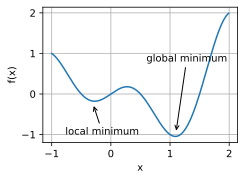

In [6]:
x = np.arange(-1.0, 2.0, 0.01)
d2l.plot(x, [f(x), ], 'x', 'f(x)')
annotate('local minimum', (-0.3, -0.25), (-0.77, -1.0))
annotate('global minimum', (1.1, -0.95), (0.6, 0.8))

## Saddle point

An example of 1-dimension saddle point is illustrated as below:

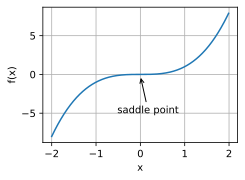

In [7]:
x = np.arange(-2.0, 2.0, 0.01)
d2l.plot(x, [x**3], 'x', 'f(x)')
annotate('saddle point', (0, -0.2), (-0.52, -5.0))

An example of 2-dimension saddle point is illustrated as below:

Text(0.5, 0, 'y')

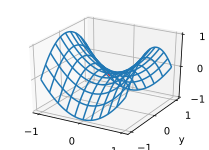

In [8]:
x, y = np.mgrid[-1: 1: 101j, -1: 1: 101j]
z = x**2 - y**2
ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 10, 'cstride': 10})
ax.plot([0], [0], [0], 'rx')
ticks = [-1, 0, 1]
d2l.plt.xticks(ticks)
d2l.plt.yticks(ticks)
ax.set_zticks(ticks)
d2l.plt.xlabel('x')
d2l.plt.ylabel('y')

## Vanishing gradient

An example of vanishing gradient is illustrated as below:

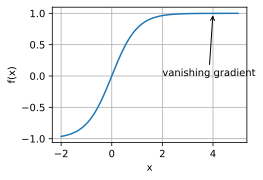

In [9]:
x = np.arange(-2.0, 5.0, 0.01)
d2l.plot(x, [np.tanh(x)], 'x', 'f(x)')
annotate('vanishing gradient', (4, 1), (2, 0.0))

# Convexity

If the algorithm performs poorly
even in the convex setting we should not hope to see great results otherwise. Furthermore, even though
the optimization problems in deep learning are generally nonconvex, they often exhibit some properties of
convex ones near local minima.

## Function

To illustrate a convex function, at first we need to import a few libraries:

In [10]:
%matplotlib inline
import d2l
from mpl_toolkits import mplot3d
import numpy as np

Let’s define a few functions, both convex and nonconvex.

In [ ]:
# convex
def f(x): 
  return 0.5 * x**2 

# nonconvex
def g(x): 
  return np.cos(np.pi * x) 

def h(x): 
  return np.exp(0.5 * x) # convex
x, segment = np.arange(-2, 2, 0.01), np.array([-1.5, 1])
d2l.use_svg_display()
_, axes = d2l.plt.subplots(1, 3, figsize=(9, 3))
for ax, func in zip(axes, [f, g, h]):
d2l.plot([x, segment], [func(x), func(segment)], axes=ax)